In [2]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl.metadata (849 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.1.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached namex-0.0.7-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.5 MB/s eta 0:00:00
  Using cached Markdown

  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 1.26.4 which is incompatible.
streamlit 1.26.0 requires pillow<10,>=7.1.0, but you have pillow 10.2.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180 

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


2024-03-24 18:56:30.680817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:30.972555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:31.692625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:31.767289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:32.273694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:32.450321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:32.726580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:32.982387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:33.094975: W tensorflow/core/framework/local_rendezvous

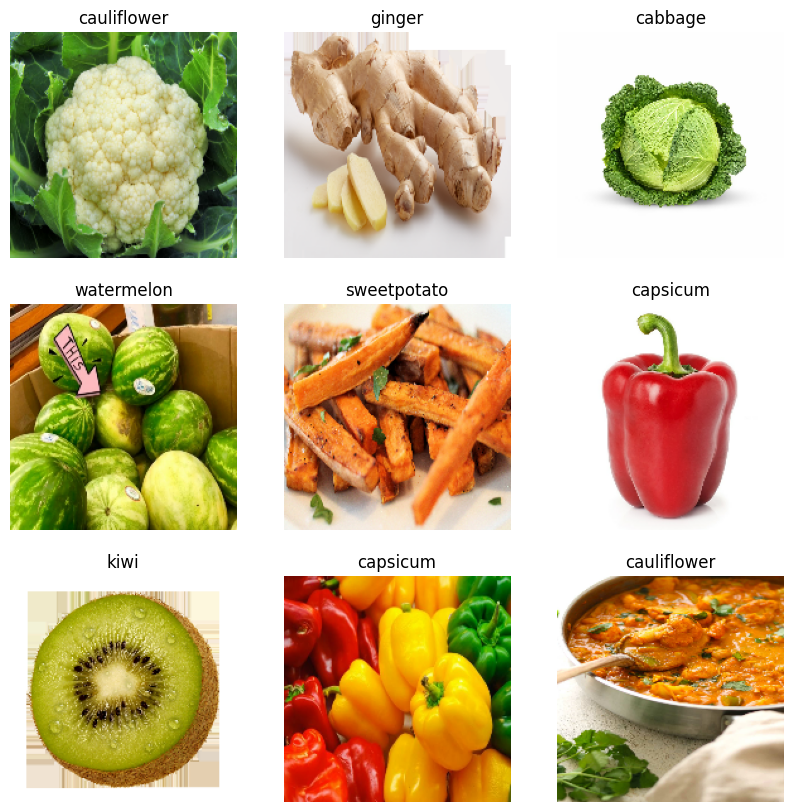

In [21]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
        
plt.show()

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [26]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-03-24 18:56:42.213707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:42.499658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:43.230279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:43.301088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:43.827291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:44.013868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 4:45 3s/step - accuracy: 0.0312 - loss: 3.5934

2024-03-24 18:56:44.380317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:56:44.649459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 47s 495ms/step - accuracy: 0.0234 - loss: 4.2169

2024-03-24 18:56:45.063388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 47s 505ms/step - accuracy: 0.0226 - loss: 4.4234

2024-03-24 18:56:45.445111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 31s 347ms/step - accuracy: 0.0245 - loss: 4.4271

2024-03-24 18:56:46.492843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.0282 - loss: 4.2065

2024-03-24 18:56:48.887655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - accuracy: 0.0333 - loss: 4.0690

2024-03-24 18:56:50.840785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 15s 290ms/step - accuracy: 0.0404 - loss: 3.8716

2024-03-24 18:56:57.232979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.0414 - loss: 3.8520

2024-03-24 18:56:57.932734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - accuracy: 0.0445 - loss: 3.7949

2024-03-24 18:57:00.679644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.0448 - loss: 3.7897

2024-03-24 18:57:01.047220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.0454 - loss: 3.7798

2024-03-24 18:57:01.642590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.0475 - loss: 3.7476

2024-03-24 18:57:03.658578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.0481 - loss: 3.7391

2024-03-24 18:57:04.527638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.0495 - loss: 3.7225

2024-03-24 18:57:06.352309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.0510 - loss: 3.7064

2024-03-24 18:57:07.498647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.0538 - loss: 3.6797

2024-03-24 18:57:09.582651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.0593 - loss: 3.6328

2024-03-24 18:57:13.793042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:14.335711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.0597 - loss: 3.6293 - val_accuracy: 0.3419 - val_loss: 2.3892
Epoch 2/25


2024-03-24 18:57:15.530909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:15.802275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:16.528879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:16.596155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:17.095196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:17.274273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 3:45 2s/step - accuracy: 0.1562 - loss: 2.7704

2024-03-24 18:57:17.571918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:17.845318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 40s 417ms/step - accuracy: 0.2031 - loss: 2.6809

2024-03-24 18:57:18.237171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 43s 461ms/step - accuracy: 0.2257 - loss: 2.6111

2024-03-24 18:57:18.609109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 31s 348ms/step - accuracy: 0.2437 - loss: 2.5934

2024-03-24 18:57:19.840991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.2590 - loss: 2.5906

2024-03-24 18:57:22.727386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.2660 - loss: 2.5819

2024-03-24 18:57:25.506214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.2820 - loss: 2.5390

2024-03-24 18:57:33.440148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.2836 - loss: 2.5341

2024-03-24 18:57:34.354055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - accuracy: 0.2879 - loss: 2.5219

2024-03-24 18:57:36.784921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 12s 325ms/step - accuracy: 0.2883 - loss: 2.5209

2024-03-24 18:57:37.122383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 0.2891 - loss: 2.5188

2024-03-24 18:57:37.647968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.2911 - loss: 2.5134

2024-03-24 18:57:39.107557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 9s 322ms/step - accuracy: 0.2918 - loss: 2.5112

2024-03-24 18:57:39.942607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step - accuracy: 0.2933 - loss: 2.5066

2024-03-24 18:57:41.486963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.2947 - loss: 2.5019

2024-03-24 18:57:42.546147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - accuracy: 0.2975 - loss: 2.4929

2024-03-24 18:57:44.469658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.3030 - loss: 2.4746

2024-03-24 18:57:48.643555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:49.223283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 337ms/step - accuracy: 0.3034 - loss: 2.4732 - val_accuracy: 0.5755 - val_loss: 1.5089
Epoch 3/25


2024-03-24 18:57:50.537274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:50.815268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:51.614610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:51.685619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:52.226374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:52.411178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 3:58 2s/step - accuracy: 0.5312 - loss: 1.9052

2024-03-24 18:57:52.736968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:57:53.036972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 46s 489ms/step - accuracy: 0.5234 - loss: 1.8006

2024-03-24 18:57:53.453300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 48s 506ms/step - accuracy: 0.5260 - loss: 1.7634

2024-03-24 18:57:53.853586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 32s 361ms/step - accuracy: 0.5000 - loss: 1.8837

2024-03-24 18:57:55.107896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.4790 - loss: 1.9369

2024-03-24 18:57:57.888806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 25s 343ms/step - accuracy: 0.4739 - loss: 1.9268

2024-03-24 18:58:00.664055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.4786 - loss: 1.8668

2024-03-24 18:58:08.368066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 16s 334ms/step - accuracy: 0.4791 - loss: 1.8603

2024-03-24 18:58:09.268358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 12s 322ms/step - accuracy: 0.4806 - loss: 1.8422

2024-03-24 18:58:11.720440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 11s 322ms/step - accuracy: 0.4808 - loss: 1.8407

2024-03-24 18:58:12.074264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.4812 - loss: 1.8377

2024-03-24 18:58:12.612607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.4824 - loss: 1.8309

2024-03-24 18:58:14.160878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 9s 322ms/step - accuracy: 0.4828 - loss: 1.8284

2024-03-24 18:58:15.035303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step - accuracy: 0.4837 - loss: 1.8233

2024-03-24 18:58:16.636344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.4843 - loss: 1.8194

2024-03-24 18:58:17.742952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.4862 - loss: 1.8093

2024-03-24 18:58:19.797198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.4895 - loss: 1.7940

2024-03-24 18:58:24.147453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:24.785123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 342ms/step - accuracy: 0.4898 - loss: 1.7929 - val_accuracy: 0.7949 - val_loss: 0.8382
Epoch 4/25


2024-03-24 18:58:26.139871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:26.429597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:27.250627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:27.322794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:27.893776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:28.098748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 4:10 3s/step - accuracy: 0.6250 - loss: 1.2414

2024-03-24 18:58:28.440194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:58:28.745454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 47s 490ms/step - accuracy: 0.6172 - loss: 1.3182

2024-03-24 18:58:29.171935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 47s 501ms/step - accuracy: 0.6094 - loss: 1.3351

2024-03-24 18:58:29.596388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 32s 356ms/step - accuracy: 0.6057 - loss: 1.3251

2024-03-24 18:58:30.755197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.6138 - loss: 1.3037

2024-03-24 18:58:33.640466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 25s 340ms/step - accuracy: 0.6257 - loss: 1.2744

2024-03-24 18:58:36.286583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step - accuracy: 0.6434 - loss: 1.2116

2024-03-24 18:58:44.396831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.6454 - loss: 1.2047

2024-03-24 18:58:45.439575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 13s 348ms/step - accuracy: 0.6504 - loss: 1.1872

2024-03-24 18:58:49.215600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 13s 352ms/step - accuracy: 0.6509 - loss: 1.1856

2024-03-24 18:58:49.663848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 12s 354ms/step - accuracy: 0.6518 - loss: 1.1824

2024-03-24 18:58:50.507229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.6540 - loss: 1.1747

2024-03-24 18:58:52.449197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.6548 - loss: 1.1717

2024-03-24 18:58:53.531527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - accuracy: 0.6564 - loss: 1.1660

2024-03-24 18:58:55.527957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.6581 - loss: 1.1604

2024-03-24 18:58:57.016904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - accuracy: 0.6611 - loss: 1.1505

2024-03-24 18:58:59.870559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.6665 - loss: 1.1319

2024-03-24 18:59:04.571995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:05.244200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 392ms/step - accuracy: 0.6669 - loss: 1.1305 - val_accuracy: 0.8689 - val_loss: 0.5412
Epoch 5/25


2024-03-24 18:59:06.750821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:07.054586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:07.945662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:08.028070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:08.658150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:08.879313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 4:33 3s/step - accuracy: 0.7500 - loss: 0.7497

2024-03-24 18:59:09.241406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:09.604898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 54s 565ms/step - accuracy: 0.7656 - loss: 0.7217

2024-03-24 18:59:10.122718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 56s 590ms/step - accuracy: 0.7500 - loss: 0.7693

2024-03-24 18:59:10.555426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 36s 403ms/step - accuracy: 0.7559 - loss: 0.7843

2024-03-24 18:59:11.834376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 34s 412ms/step - accuracy: 0.7688 - loss: 0.7892

2024-03-24 18:59:15.265490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 28s 381ms/step - accuracy: 0.7797 - loss: 0.7756

2024-03-24 18:59:18.068243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.7941 - loss: 0.7391

2024-03-24 18:59:26.685190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 19s 383ms/step - accuracy: 0.7951 - loss: 0.7357

2024-03-24 18:59:27.457291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 14s 368ms/step - accuracy: 0.7994 - loss: 0.7205

2024-03-24 18:59:30.381754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 14s 368ms/step - accuracy: 0.7998 - loss: 0.7191

2024-03-24 18:59:30.787265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 13s 364ms/step - accuracy: 0.8009 - loss: 0.7149

2024-03-24 18:59:31.468553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.8029 - loss: 0.7065

2024-03-24 18:59:33.309805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.8036 - loss: 0.7036

2024-03-24 18:59:34.384315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 0.8050 - loss: 0.6978

2024-03-24 18:59:36.158029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.8061 - loss: 0.6934

2024-03-24 18:59:37.377402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - accuracy: 0.8088 - loss: 0.6823

2024-03-24 18:59:39.721835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8130 - loss: 0.6655

2024-03-24 18:59:44.566502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:45.232925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 383ms/step - accuracy: 0.8133 - loss: 0.6643 - val_accuracy: 0.9430 - val_loss: 0.3725
Epoch 6/25


2024-03-24 18:59:46.681092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:46.999352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:47.862181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:47.994383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:48.594549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:48.804832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 4:30 3s/step - accuracy: 0.9688 - loss: 0.3891

2024-03-24 18:59:49.165416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 18:59:49.519950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 52s 548ms/step - accuracy: 0.9609 - loss: 0.3348

2024-03-24 18:59:49.995649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 54s 571ms/step - accuracy: 0.9566 - loss: 0.3168

2024-03-24 18:59:50.421512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 36s 399ms/step - accuracy: 0.9263 - loss: 0.3434

2024-03-24 18:59:51.739437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 32s 390ms/step - accuracy: 0.9117 - loss: 0.3760

2024-03-24 18:59:54.970437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 27s 377ms/step - accuracy: 0.9092 - loss: 0.3832

2024-03-24 18:59:57.900245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.9079 - loss: 0.3812

2024-03-24 19:00:07.105076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 17s 381ms/step - accuracy: 0.9077 - loss: 0.3799

2024-03-24 19:00:08.235384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 14s 376ms/step - accuracy: 0.9079 - loss: 0.3764

2024-03-24 19:00:11.673895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 14s 380ms/step - accuracy: 0.9079 - loss: 0.3759

2024-03-24 19:00:12.077303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 13s 379ms/step - accuracy: 0.9080 - loss: 0.3749

2024-03-24 19:00:12.766681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 11s 382ms/step - accuracy: 0.9084 - loss: 0.3723

2024-03-24 19:00:14.697369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.9086 - loss: 0.3712

2024-03-24 19:00:15.834268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.9089 - loss: 0.3689

2024-03-24 19:00:17.778712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 8s 391ms/step - accuracy: 0.9093 - loss: 0.3671

2024-03-24 19:00:19.153323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step - accuracy: 0.9103 - loss: 0.3622

2024-03-24 19:00:22.019347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.9117 - loss: 0.3549

2024-03-24 19:00:27.529616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:28.262199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 417ms/step - accuracy: 0.9118 - loss: 0.3544 - val_accuracy: 0.9430 - val_loss: 0.3854
Epoch 7/25


2024-03-24 19:00:29.926167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:30.249386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:31.143949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:31.227655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:31.830996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:32.039212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 4:35 3s/step - accuracy: 0.7812 - loss: 1.1032

2024-03-24 19:00:32.424615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:00:32.832657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 58s 605ms/step - accuracy: 0.8125 - loss: 0.8826

2024-03-24 19:00:33.360012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 58s 616ms/step - accuracy: 0.8299 - loss: 0.7763

2024-03-24 19:00:33.892885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 38s 433ms/step - accuracy: 0.8691 - loss: 0.5853

2024-03-24 19:00:35.636580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 37s 457ms/step - accuracy: 0.8922 - loss: 0.4790

2024-03-24 19:00:39.408190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 33s 459ms/step - accuracy: 0.9056 - loss: 0.4217

2024-03-24 19:00:43.112812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 23s 468ms/step - accuracy: 0.9156 - loss: 0.3629

2024-03-24 19:00:54.164305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - accuracy: 0.9165 - loss: 0.3568

2024-03-24 19:00:55.372347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.9180 - loss: 0.3454

2024-03-24 19:00:59.616550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 16s 459ms/step - accuracy: 0.9181 - loss: 0.3443

2024-03-24 19:01:00.161025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 16s 460ms/step - accuracy: 0.9183 - loss: 0.3424

2024-03-24 19:01:01.010963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 13s 461ms/step - accuracy: 0.9188 - loss: 0.3376

2024-03-24 19:01:03.290644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - accuracy: 0.9191 - loss: 0.3357

2024-03-24 19:01:04.541176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 11s 465ms/step - accuracy: 0.9196 - loss: 0.3322

2024-03-24 19:01:06.788199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 9s 470ms/step - accuracy: 0.9201 - loss: 0.3297 

2024-03-24 19:01:08.402378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.9212 - loss: 0.3232

2024-03-24 19:01:11.769803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9228 - loss: 0.3144

2024-03-24 19:01:18.220496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:19.049390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 497ms/step - accuracy: 0.9230 - loss: 0.3138 - val_accuracy: 0.9516 - val_loss: 0.3373
Epoch 8/25


2024-03-24 19:01:20.982082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:21.348806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:22.343098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:22.431053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:23.100228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:23.324241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:03 3s/step - accuracy: 0.9375 - loss: 0.1004

2024-03-24 19:01:23.764936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:01:24.209683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 700ms/step - accuracy: 0.9375 - loss: 0.0990

2024-03-24 19:01:24.804330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 693ms/step - accuracy: 0.9410 - loss: 0.1123

2024-03-24 19:01:25.376065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 44s 497ms/step - accuracy: 0.9433 - loss: 0.1803

2024-03-24 19:01:27.465631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 43s 527ms/step - accuracy: 0.9417 - loss: 0.2340

2024-03-24 19:01:31.898428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 38s 525ms/step - accuracy: 0.9424 - loss: 0.2533

2024-03-24 19:01:35.916007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 27s 532ms/step - accuracy: 0.9437 - loss: 0.2593

2024-03-24 19:01:48.419559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 24s 519ms/step - accuracy: 0.9440 - loss: 0.2578

2024-03-24 19:01:49.754389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 19s 510ms/step - accuracy: 0.9447 - loss: 0.2538

2024-03-24 19:01:54.192138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 18s 513ms/step - accuracy: 0.9448 - loss: 0.2533

2024-03-24 19:01:54.721439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 18s 516ms/step - accuracy: 0.9451 - loss: 0.2521

2024-03-24 19:01:55.945440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 16s 519ms/step - accuracy: 0.9454 - loss: 0.2499

2024-03-24 19:01:58.464859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 14s 525ms/step - accuracy: 0.9457 - loss: 0.2483

2024-03-24 19:02:00.152580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 12s 526ms/step - accuracy: 0.9460 - loss: 0.2461

2024-03-24 19:02:02.626499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 11s 530ms/step - accuracy: 0.9463 - loss: 0.2444

2024-03-24 19:02:04.317117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 6s 523ms/step - accuracy: 0.9470 - loss: 0.2403

2024-03-24 19:02:08.018266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9480 - loss: 0.2346

2024-03-24 19:02:14.707842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:15.601201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 551ms/step - accuracy: 0.9481 - loss: 0.2342 - val_accuracy: 0.9544 - val_loss: 0.3305
Epoch 9/25


2024-03-24 19:02:17.555919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:17.969314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:19.009585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:19.101822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:19.786509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:20.021383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:17 3s/step - accuracy: 1.0000 - loss: 0.0846

2024-03-24 19:02:20.496050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:02:20.962257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 761ms/step - accuracy: 1.0000 - loss: 0.0732

2024-03-24 19:02:21.586693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 747ms/step - accuracy: 0.9931 - loss: 0.0934

2024-03-24 19:02:22.192474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 47s 528ms/step - accuracy: 0.9801 - loss: 0.1321

2024-03-24 19:02:24.384340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 45s 550ms/step - accuracy: 0.9728 - loss: 0.1739

2024-03-24 19:02:28.921637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.9707 - loss: 0.1893

2024-03-24 19:02:33.135471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.9708 - loss: 0.1849

2024-03-24 19:02:45.887603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 25s 536ms/step - accuracy: 0.9709 - loss: 0.1834

2024-03-24 19:02:47.384714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 20s 529ms/step - accuracy: 0.9710 - loss: 0.1802

2024-03-24 19:02:52.047098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 19s 533ms/step - accuracy: 0.9710 - loss: 0.1798

2024-03-24 19:02:52.555939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 18s 532ms/step - accuracy: 0.9710 - loss: 0.1790

2024-03-24 19:02:53.604748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 16s 534ms/step - accuracy: 0.9711 - loss: 0.1775

2024-03-24 19:02:56.393444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 15s 547ms/step - accuracy: 0.9713 - loss: 0.1762

2024-03-24 19:02:58.395951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 13s 568ms/step - accuracy: 0.9714 - loss: 0.1745

2024-03-24 19:03:02.405528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 12s 582ms/step - accuracy: 0.9715 - loss: 0.1732

2024-03-24 19:03:05.039981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 636ms/step - accuracy: 0.9719 - loss: 0.1695

2024-03-24 19:03:14.541120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.9725 - loss: 0.1642

2024-03-24 19:03:23.667709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:24.887930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 694ms/step - accuracy: 0.9726 - loss: 0.1638 - val_accuracy: 0.9658 - val_loss: 0.3285
Epoch 10/25


2024-03-24 19:03:28.315909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:28.833852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:29.962813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:30.061585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:30.810426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:31.053054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:59 4s/step - accuracy: 0.9375 - loss: 0.1159

2024-03-24 19:03:31.518017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:03:32.029851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:15 788ms/step - accuracy: 0.9531 - loss: 0.0943

2024-03-24 19:03:32.660224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 753ms/step - accuracy: 0.9618 - loss: 0.0814

2024-03-24 19:03:33.247044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 47s 531ms/step - accuracy: 0.9694 - loss: 0.1148

2024-03-24 19:03:35.459814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 45s 555ms/step - accuracy: 0.9735 - loss: 0.1248

2024-03-24 19:03:40.081361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 41s 556ms/step - accuracy: 0.9740 - loss: 0.1464

2024-03-24 19:03:44.442341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 28s 579ms/step - accuracy: 0.9727 - loss: 0.1775

2024-03-24 19:03:58.720526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 26s 572ms/step - accuracy: 0.9728 - loss: 0.1777

2024-03-24 19:04:00.304643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 21s 573ms/step - accuracy: 0.9733 - loss: 0.1763

2024-03-24 19:04:05.752645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 21s 577ms/step - accuracy: 0.9734 - loss: 0.1762

2024-03-24 19:04:06.275842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 20s 576ms/step - accuracy: 0.9735 - loss: 0.1757

2024-03-24 19:04:07.413891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 17s 578ms/step - accuracy: 0.9737 - loss: 0.1747

2024-03-24 19:04:10.354243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 16s 584ms/step - accuracy: 0.9738 - loss: 0.1739

2024-03-24 19:04:11.914050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 595ms/step - accuracy: 0.9740 - loss: 0.1726

2024-03-24 19:04:15.490085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 12s 599ms/step - accuracy: 0.9742 - loss: 0.1716

2024-03-24 19:04:17.409686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 590ms/step - accuracy: 0.9746 - loss: 0.1685

2024-03-24 19:04:21.441291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.9754 - loss: 0.1636

2024-03-24 19:04:29.666661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:31.014358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 635ms/step - accuracy: 0.9754 - loss: 0.1632 - val_accuracy: 0.9658 - val_loss: 0.3563
Epoch 11/25


2024-03-24 19:04:33.469846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:33.930985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:35.058771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:35.162141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:35.904764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:36.153120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:45 4s/step - accuracy: 1.0000 - loss: 0.0432

2024-03-24 19:04:36.643330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:04:37.168617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 814ms/step - accuracy: 0.9922 - loss: 0.0810

2024-03-24 19:04:37.877071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:16 802ms/step - accuracy: 0.9844 - loss: 0.1090

2024-03-24 19:04:38.539581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 52s 582ms/step - accuracy: 0.9722 - loss: 0.1645

2024-03-24 19:04:41.010323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 53s 648ms/step - accuracy: 0.9730 - loss: 0.1814

2024-03-24 19:04:46.703596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 55s 744ms/step - accuracy: 0.9736 - loss: 0.1777

2024-03-24 19:04:54.051265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 46s 905ms/step - accuracy: 0.9744 - loss: 0.1813

2024-03-24 19:05:18.897673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 41s 889ms/step - accuracy: 0.9748 - loss: 0.1797

2024-03-24 19:05:21.301279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 32s 858ms/step - accuracy: 0.9756 - loss: 0.1756

2024-03-24 19:05:27.646737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 31s 857ms/step - accuracy: 0.9756 - loss: 0.1751

2024-03-24 19:05:28.199180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 29s 847ms/step - accuracy: 0.9758 - loss: 0.1741

2024-03-24 19:05:29.424299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 24s 833ms/step - accuracy: 0.9762 - loss: 0.1716

2024-03-24 19:05:32.423081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 23s 832ms/step - accuracy: 0.9763 - loss: 0.1706

2024-03-24 19:05:34.357058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 19s 823ms/step - accuracy: 0.9766 - loss: 0.1685

2024-03-24 19:05:37.320985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 16s 819ms/step - accuracy: 0.9769 - loss: 0.1664

2024-03-24 19:05:39.982585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 10s 800ms/step - accuracy: 0.9775 - loss: 0.1625

2024-03-24 19:05:44.241369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.9783 - loss: 0.1560

2024-03-24 19:05:53.070577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:05:54.033301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 819ms/step - accuracy: 0.9784 - loss: 0.1555 - val_accuracy: 0.9658 - val_loss: 0.2531
Epoch 12/25


2024-03-24 19:05:56.455152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:05:56.952186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:05:58.147339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:05:58.249168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:05:59.150377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:05:59.409768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:21 4s/step - accuracy: 1.0000 - loss: 0.0112

2024-03-24 19:05:59.976224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:06:00.527182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 864ms/step - accuracy: 1.0000 - loss: 0.0116

2024-03-24 19:06:01.251966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 836ms/step - accuracy: 1.0000 - loss: 0.0128

2024-03-24 19:06:01.950361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 53s 597ms/step - accuracy: 0.9985 - loss: 0.0274

2024-03-24 19:06:04.417792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 52s 646ms/step - accuracy: 0.9934 - loss: 0.0507

2024-03-24 19:06:09.968991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 51s 693ms/step - accuracy: 0.9910 - loss: 0.0591

2024-03-24 19:06:16.248248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 652ms/step - accuracy: 0.9869 - loss: 0.0797

2024-03-24 19:06:30.620679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 638ms/step - accuracy: 0.9866 - loss: 0.0816

2024-03-24 19:06:32.234692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 24s 640ms/step - accuracy: 0.9862 - loss: 0.0849

2024-03-24 19:06:38.383010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 24s 655ms/step - accuracy: 0.9862 - loss: 0.0852

2024-03-24 19:06:39.540797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 23s 678ms/step - accuracy: 0.9861 - loss: 0.0856

2024-03-24 19:06:42.322383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 22s 728ms/step - accuracy: 0.9860 - loss: 0.0864

2024-03-24 19:06:48.679576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 20s 742ms/step - accuracy: 0.9860 - loss: 0.0869

2024-03-24 19:06:51.398370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 749ms/step - accuracy: 0.9859 - loss: 0.0877

2024-03-24 19:06:55.243826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step - accuracy: 0.9858 - loss: 0.0882

2024-03-24 19:07:00.362291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 10s 817ms/step - accuracy: 0.9856 - loss: 0.0891

2024-03-24 19:07:09.401197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.9856 - loss: 0.0903

2024-03-24 19:07:20.109277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:21.182724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 856ms/step - accuracy: 0.9856 - loss: 0.0903 - val_accuracy: 0.9601 - val_loss: 0.3045
Epoch 13/25


2024-03-24 19:07:23.434557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:23.902292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:25.151933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:25.255653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:26.021850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:26.290479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:14 4s/step - accuracy: 1.0000 - loss: 0.0445

2024-03-24 19:07:26.852925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:07:27.480092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:23 869ms/step - accuracy: 1.0000 - loss: 0.0407

2024-03-24 19:07:28.199297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 832ms/step - accuracy: 0.9965 - loss: 0.0423

2024-03-24 19:07:28.867095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 55s 615ms/step - accuracy: 0.9838 - loss: 0.1046

2024-03-24 19:07:31.544243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 53s 649ms/step - accuracy: 0.9794 - loss: 0.1346

2024-03-24 19:07:36.942260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 47s 642ms/step - accuracy: 0.9786 - loss: 0.1399

2024-03-24 19:07:41.844822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 31s 634ms/step - accuracy: 0.9789 - loss: 0.1371

2024-03-24 19:07:56.805695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 29s 620ms/step - accuracy: 0.9792 - loss: 0.1354

2024-03-24 19:07:58.277871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 23s 616ms/step - accuracy: 0.9798 - loss: 0.1307

2024-03-24 19:08:03.690421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 22s 619ms/step - accuracy: 0.9798 - loss: 0.1302

2024-03-24 19:08:04.270500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 21s 616ms/step - accuracy: 0.9799 - loss: 0.1294

2024-03-24 19:08:05.306256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 18s 614ms/step - accuracy: 0.9802 - loss: 0.1274

2024-03-24 19:08:08.009509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 17s 618ms/step - accuracy: 0.9803 - loss: 0.1266

2024-03-24 19:08:09.839577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 14s 617ms/step - accuracy: 0.9806 - loss: 0.1249

2024-03-24 19:08:12.489672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 12s 618ms/step - accuracy: 0.9808 - loss: 0.1232

2024-03-24 19:08:14.519974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 7s 615ms/step - accuracy: 0.9811 - loss: 0.1207

2024-03-24 19:08:19.015124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.9817 - loss: 0.1166

2024-03-24 19:08:27.945845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:29.108300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 663ms/step - accuracy: 0.9817 - loss: 0.1163 - val_accuracy: 0.9573 - val_loss: 0.2956
Epoch 14/25


2024-03-24 19:08:31.640825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:32.189261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:33.405494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:33.507120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:34.355854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:34.619842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:17 4s/step - accuracy: 1.0000 - loss: 0.0049

2024-03-24 19:08:35.166371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:08:35.682287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 860ms/step - accuracy: 0.9844 - loss: 0.0291

2024-03-24 19:08:36.381600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 817ms/step - accuracy: 0.9792 - loss: 0.0450

2024-03-24 19:08:36.980033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 56s 626ms/step - accuracy: 0.9754 - loss: 0.0725

2024-03-24 19:08:39.801990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 54s 664ms/step - accuracy: 0.9776 - loss: 0.0871

2024-03-24 19:08:45.399914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 52s 708ms/step - accuracy: 0.9790 - loss: 0.0933

2024-03-24 19:08:51.626232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 36s 731ms/step - accuracy: 0.9803 - loss: 0.0989

2024-03-24 19:09:09.507389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 33s 711ms/step - accuracy: 0.9805 - loss: 0.0983

2024-03-24 19:09:10.959378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 25s 684ms/step - accuracy: 0.9810 - loss: 0.0965

2024-03-24 19:09:15.855980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 25s 685ms/step - accuracy: 0.9810 - loss: 0.0962

2024-03-24 19:09:16.405631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 23s 681ms/step - accuracy: 0.9811 - loss: 0.0958

2024-03-24 19:09:17.547203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.9814 - loss: 0.0945

2024-03-24 19:09:20.441252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 19s 679ms/step - accuracy: 0.9815 - loss: 0.0941

2024-03-24 19:09:22.111948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 674ms/step - accuracy: 0.9817 - loss: 0.0932

2024-03-24 19:09:24.801516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 13s 670ms/step - accuracy: 0.9819 - loss: 0.0923

2024-03-24 19:09:26.660093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 655ms/step - accuracy: 0.9822 - loss: 0.0908

2024-03-24 19:09:30.515847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9828 - loss: 0.0885

2024-03-24 19:09:38.535841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:39.520772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 698ms/step - accuracy: 0.9828 - loss: 0.0883 - val_accuracy: 0.9658 - val_loss: 0.2472
Epoch 15/25


2024-03-24 19:09:43.730536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:44.814047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:46.805837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:46.956359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:48.057634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:48.370798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:09:48.889039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 9:47 6s/step - accuracy: 1.0000 - loss: 0.0210

2024-03-24 19:09:49.522539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:33 974ms/step - accuracy: 0.9922 - loss: 0.1340

2024-03-24 19:09:50.376719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 0.9913 - loss: 0.1455   

2024-03-24 19:09:51.213405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 745ms/step - accuracy: 0.9872 - loss: 0.1480

2024-03-24 19:09:54.460987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 753ms/step - accuracy: 0.9842 - loss: 0.1462

2024-03-24 19:10:00.520575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 52s 703ms/step - accuracy: 0.9842 - loss: 0.1351

2024-03-24 19:10:05.313822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 33s 672ms/step - accuracy: 0.9838 - loss: 0.1186

2024-03-24 19:10:20.608215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 658ms/step - accuracy: 0.9838 - loss: 0.1167

2024-03-24 19:10:22.118133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 24s 649ms/step - accuracy: 0.9841 - loss: 0.1115

2024-03-24 19:10:27.611737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 24s 651ms/step - accuracy: 0.9842 - loss: 0.1110

2024-03-24 19:10:28.228515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 22s 649ms/step - accuracy: 0.9842 - loss: 0.1100

2024-03-24 19:10:29.428864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 20s 648ms/step - accuracy: 0.9843 - loss: 0.1081

2024-03-24 19:10:32.294903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 18s 648ms/step - accuracy: 0.9844 - loss: 0.1068

2024-03-24 19:10:33.877320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 646ms/step - accuracy: 0.9846 - loss: 0.1051

2024-03-24 19:10:36.652133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 13s 665ms/step - accuracy: 0.9847 - loss: 0.1034

2024-03-24 19:10:40.168823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 666ms/step - accuracy: 0.9850 - loss: 0.1006

2024-03-24 19:10:45.362179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.9855 - loss: 0.0959

2024-03-24 19:10:55.063807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:10:56.240820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 728ms/step - accuracy: 0.9855 - loss: 0.0956 - val_accuracy: 0.9658 - val_loss: 0.2233
Epoch 16/25


2024-03-24 19:11:00.041279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:11:00.532833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:11:01.761740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:11:01.866639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:11:02.684115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:11:02.964180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:11:03.490620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:24 4s/step - accuracy: 1.0000 - loss: 0.0056

2024-03-24 19:11:04.070021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 810ms/step - accuracy: 0.9922 - loss: 0.0248

2024-03-24 19:11:04.794848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 831ms/step - accuracy: 0.9878 - loss: 0.0725

2024-03-24 19:11:05.498295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 59s 662ms/step - accuracy: 0.9834 - loss: 0.1206 

2024-03-24 19:11:08.477030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 54s 661ms/step - accuracy: 0.9843 - loss: 0.1114

2024-03-24 19:11:13.722704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 47s 644ms/step - accuracy: 0.9845 - loss: 0.1041

2024-03-24 19:11:18.490218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 31s 629ms/step - accuracy: 0.9841 - loss: 0.0955

2024-03-24 19:11:33.107269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 29s 619ms/step - accuracy: 0.9842 - loss: 0.0943

2024-03-24 19:11:34.770644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 23s 612ms/step - accuracy: 0.9844 - loss: 0.0907

2024-03-24 19:11:40.117081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 22s 615ms/step - accuracy: 0.9844 - loss: 0.0904

2024-03-24 19:11:40.727213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 21s 617ms/step - accuracy: 0.9845 - loss: 0.0896

2024-03-24 19:11:42.047424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 19s 621ms/step - accuracy: 0.9846 - loss: 0.0882

2024-03-24 19:11:45.076458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 17s 626ms/step - accuracy: 0.9848 - loss: 0.0870

2024-03-24 19:11:46.928531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 634ms/step - accuracy: 0.9850 - loss: 0.0856

2024-03-24 19:11:50.414155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 12s 644ms/step - accuracy: 0.9851 - loss: 0.0841

2024-03-24 19:11:53.215235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 648ms/step - accuracy: 0.9854 - loss: 0.0817

2024-03-24 19:11:58.477634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.9859 - loss: 0.0783

2024-03-24 19:12:10.232286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:11.219473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 717ms/step - accuracy: 0.9860 - loss: 0.0781 - val_accuracy: 0.9601 - val_loss: 0.3063
Epoch 17/25


2024-03-24 19:12:13.497770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:13.978397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:15.153994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:15.256351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:16.013290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:16.267420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:55 4s/step - accuracy: 1.0000 - loss: 0.0046

2024-03-24 19:12:16.759662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:12:17.310115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 816ms/step - accuracy: 1.0000 - loss: 0.0038

2024-03-24 19:12:17.987912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 818ms/step - accuracy: 1.0000 - loss: 0.0036

2024-03-24 19:12:18.659508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 52s 587ms/step - accuracy: 0.9903 - loss: 0.0517

2024-03-24 19:12:21.139885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 49s 609ms/step - accuracy: 0.9873 - loss: 0.0667

2024-03-24 19:12:26.165858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 46s 622ms/step - accuracy: 0.9863 - loss: 0.0721

2024-03-24 19:12:31.281077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 31s 629ms/step - accuracy: 0.9832 - loss: 0.0763

2024-03-24 19:12:46.366380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 29s 618ms/step - accuracy: 0.9831 - loss: 0.0760

2024-03-24 19:12:47.887053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 23s 610ms/step - accuracy: 0.9831 - loss: 0.0745

2024-03-24 19:12:53.198887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 22s 614ms/step - accuracy: 0.9831 - loss: 0.0742

2024-03-24 19:12:53.890262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 21s 614ms/step - accuracy: 0.9832 - loss: 0.0738

2024-03-24 19:12:55.101998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 19s 619ms/step - accuracy: 0.9833 - loss: 0.0730

2024-03-24 19:12:58.160919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 17s 630ms/step - accuracy: 0.9833 - loss: 0.0725

2024-03-24 19:13:00.585865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 633ms/step - accuracy: 0.9835 - loss: 0.0718

2024-03-24 19:13:03.573176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 12s 636ms/step - accuracy: 0.9836 - loss: 0.0711

2024-03-24 19:13:05.714616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 628ms/step - accuracy: 0.9838 - loss: 0.0698

2024-03-24 19:13:09.942246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.9841 - loss: 0.0678

2024-03-24 19:13:17.784398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:18.785887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 660ms/step - accuracy: 0.9841 - loss: 0.0676 - val_accuracy: 0.9630 - val_loss: 0.2345
Epoch 18/25


2024-03-24 19:13:21.153842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:21.631384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:22.789320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:22.895954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:23.667224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:23.922282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:54 4s/step - accuracy: 1.0000 - loss: 0.0094

2024-03-24 19:13:24.397995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:13:24.933255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 816ms/step - accuracy: 1.0000 - loss: 0.0083

2024-03-24 19:13:25.635297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:16 807ms/step - accuracy: 1.0000 - loss: 0.0081

2024-03-24 19:13:26.295766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 55s 620ms/step - accuracy: 0.9961 - loss: 0.0200

2024-03-24 19:13:29.011968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 53s 647ms/step - accuracy: 0.9924 - loss: 0.0439

2024-03-24 19:13:34.369351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 49s 664ms/step - accuracy: 0.9891 - loss: 0.0579

2024-03-24 19:13:39.755854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 32s 656ms/step - accuracy: 0.9855 - loss: 0.0725

2024-03-24 19:13:55.317939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 30s 643ms/step - accuracy: 0.9854 - loss: 0.0726

2024-03-24 19:13:56.807596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 24s 645ms/step - accuracy: 0.9853 - loss: 0.0721

2024-03-24 19:14:02.892167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 23s 648ms/step - accuracy: 0.9853 - loss: 0.0720

2024-03-24 19:14:03.488896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 22s 646ms/step - accuracy: 0.9853 - loss: 0.0717

2024-03-24 19:14:04.653107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 19s 644ms/step - accuracy: 0.9853 - loss: 0.0711

2024-03-24 19:14:07.469182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 18s 644ms/step - accuracy: 0.9853 - loss: 0.0707

2024-03-24 19:14:09.052432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 15s 641ms/step - accuracy: 0.9853 - loss: 0.0701

2024-03-24 19:14:11.723871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 13s 649ms/step - accuracy: 0.9854 - loss: 0.0696

2024-03-24 19:14:14.173576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 8s 638ms/step - accuracy: 0.9855 - loss: 0.0683

2024-03-24 19:14:18.447138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9857 - loss: 0.0663

2024-03-24 19:14:26.371779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:27.350905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 668ms/step - accuracy: 0.9857 - loss: 0.0662 - val_accuracy: 0.9658 - val_loss: 0.2637
Epoch 19/25


2024-03-24 19:14:29.620201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:30.078183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:31.209109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:31.310153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:32.058310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:32.308802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 5:46 4s/step - accuracy: 1.0000 - loss: 0.0042

2024-03-24 19:14:32.796302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:14:33.311587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:16 801ms/step - accuracy: 1.0000 - loss: 0.0036

2024-03-24 19:14:33.985578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 813ms/step - accuracy: 1.0000 - loss: 0.0035

2024-03-24 19:14:34.703438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 52s 585ms/step - accuracy: 0.9909 - loss: 0.0485

2024-03-24 19:14:37.102873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 53s 658ms/step - accuracy: 0.9818 - loss: 0.0704

2024-03-24 19:14:43.002159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 52s 705ms/step - accuracy: 0.9779 - loss: 0.0803

2024-03-24 19:14:49.176075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 36s 725ms/step - accuracy: 0.9767 - loss: 0.0949

2024-03-24 19:15:06.854165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 33s 709ms/step - accuracy: 0.9770 - loss: 0.0944

2024-03-24 19:15:08.491382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 26s 685ms/step - accuracy: 0.9776 - loss: 0.0926

2024-03-24 19:15:13.607475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 25s 687ms/step - accuracy: 0.9777 - loss: 0.0924

2024-03-24 19:15:14.250427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 24s 686ms/step - accuracy: 0.9778 - loss: 0.0919

2024-03-24 19:15:15.577443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 20s 694ms/step - accuracy: 0.9781 - loss: 0.0910

2024-03-24 19:15:19.253070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 19s 701ms/step - accuracy: 0.9782 - loss: 0.0905

2024-03-24 19:15:21.450667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 708ms/step - accuracy: 0.9785 - loss: 0.0896

2024-03-24 19:15:25.132308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 14s 711ms/step - accuracy: 0.9788 - loss: 0.0887

2024-03-24 19:15:27.639414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 9s 709ms/step - accuracy: 0.9792 - loss: 0.0869

2024-03-24 19:15:32.825322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.9800 - loss: 0.0839

2024-03-24 19:15:43.870078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:45.026754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 768ms/step - accuracy: 0.9801 - loss: 0.0836 - val_accuracy: 0.9658 - val_loss: 0.2632
Epoch 20/25


2024-03-24 19:15:47.693776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:48.439059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:50.079250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:50.265035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:51.223627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:51.562981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:15:52.383721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:28 5s/step - accuracy: 1.0000 - loss: 0.0022

2024-03-24 19:15:53.133141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:34 985ms/step - accuracy: 1.0000 - loss: 0.0021

2024-03-24 19:15:53.992196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:33 988ms/step - accuracy: 0.9965 - loss: 0.0410

2024-03-24 19:15:55.044347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - accuracy: 0.9876 - loss: 0.0756

2024-03-24 19:16:02.017249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 1s/step - accuracy: 0.9876 - loss: 0.0758

2024-03-24 19:16:08.251283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 903ms/step - accuracy: 0.9872 - loss: 0.0847

2024-03-24 19:16:13.451090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 41s 824ms/step - accuracy: 0.9849 - loss: 0.0868

2024-03-24 19:16:31.275783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 38s 809ms/step - accuracy: 0.9849 - loss: 0.0858

2024-03-24 19:16:33.370437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 29s 788ms/step - accuracy: 0.9850 - loss: 0.0828

2024-03-24 19:16:39.459764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 29s 791ms/step - accuracy: 0.9850 - loss: 0.0824

2024-03-24 19:16:40.211442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 27s 786ms/step - accuracy: 0.9850 - loss: 0.0818

2024-03-24 19:16:41.410517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 24s 788ms/step - accuracy: 0.9851 - loss: 0.0804

2024-03-24 19:16:45.128633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 22s 787ms/step - accuracy: 0.9852 - loss: 0.0794

2024-03-24 19:16:46.998229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 18s 779ms/step - accuracy: 0.9853 - loss: 0.0783

2024-03-24 19:16:49.953827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 15s 782ms/step - accuracy: 0.9854 - loss: 0.0773

2024-03-24 19:16:52.853809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 10s 787ms/step - accuracy: 0.9856 - loss: 0.0756

2024-03-24 19:16:59.443314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.9858 - loss: 0.0733

2024-03-24 19:17:08.327128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:09.765874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 826ms/step - accuracy: 0.9859 - loss: 0.0732 - val_accuracy: 0.9630 - val_loss: 0.2513
Epoch 21/25


2024-03-24 19:17:13.335178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:13.886627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:15.690766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:15.808570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:16.764562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:17.085785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:17:17.748493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:48 5s/step - accuracy: 1.0000 - loss: 0.0207

2024-03-24 19:17:18.946107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 2:30 2s/step - accuracy: 1.0000 - loss: 0.0218

2024-03-24 19:17:20.401204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 1.0000 - loss: 0.0272

2024-03-24 19:17:21.252514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 804ms/step - accuracy: 0.9970 - loss: 0.0361

2024-03-24 19:17:24.037661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 777ms/step - accuracy: 0.9920 - loss: 0.0483

2024-03-24 19:17:30.055545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 59s 804ms/step - accuracy: 0.9894 - loss: 0.0575

2024-03-24 19:17:36.898066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 37s 750ms/step - accuracy: 0.9873 - loss: 0.0647

2024-03-24 19:17:53.372165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 34s 736ms/step - accuracy: 0.9872 - loss: 0.0647

2024-03-24 19:17:55.241036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 28s 741ms/step - accuracy: 0.9872 - loss: 0.0640

2024-03-24 19:18:02.325293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 27s 745ms/step - accuracy: 0.9872 - loss: 0.0639

2024-03-24 19:18:03.052030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 25s 743ms/step - accuracy: 0.9872 - loss: 0.0638

2024-03-24 19:18:04.387424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 22s 736ms/step - accuracy: 0.9871 - loss: 0.0636

2024-03-24 19:18:07.492950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 20s 737ms/step - accuracy: 0.9871 - loss: 0.0635

2024-03-24 19:18:09.186502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 728ms/step - accuracy: 0.9871 - loss: 0.0631

2024-03-24 19:18:11.833445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 15s 727ms/step - accuracy: 0.9871 - loss: 0.0628

2024-03-24 19:18:13.797345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 9s 721ms/step - accuracy: 0.9872 - loss: 0.0619 

2024-03-24 19:18:19.148340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.9874 - loss: 0.0604

2024-03-24 19:18:29.565847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:30.656491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 767ms/step - accuracy: 0.9874 - loss: 0.0603 - val_accuracy: 0.9630 - val_loss: 0.2362
Epoch 22/25


2024-03-24 19:18:32.942343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:33.425566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:34.883926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:35.018409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:36.029876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:36.579739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:18:37.536794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 8:27 5s/step - accuracy: 1.0000 - loss: 0.0100

2024-03-24 19:18:38.446834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - accuracy: 1.0000 - loss: 0.0097

2024-03-24 19:18:39.448038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:44 1s/step - accuracy: 1.0000 - loss: 0.0088

2024-03-24 19:18:40.347456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 778ms/step - accuracy: 0.9945 - loss: 0.0366

2024-03-24 19:18:43.567263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 857ms/step - accuracy: 0.9930 - loss: 0.0552

2024-03-24 19:18:50.967679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 845ms/step - accuracy: 0.9914 - loss: 0.0589

2024-03-24 19:18:57.333249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 40s 793ms/step - accuracy: 0.9869 - loss: 0.0730

2024-03-24 19:19:14.881598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 36s 772ms/step - accuracy: 0.9866 - loss: 0.0739

2024-03-24 19:19:16.707899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 28s 761ms/step - accuracy: 0.9862 - loss: 0.0745

2024-03-24 19:19:23.194386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 28s 769ms/step - accuracy: 0.9861 - loss: 0.0746

2024-03-24 19:19:24.182582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 26s 770ms/step - accuracy: 0.9861 - loss: 0.0746

2024-03-24 19:19:25.966302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 24s 783ms/step - accuracy: 0.9860 - loss: 0.0744

2024-03-24 19:19:30.063108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 21s 782ms/step - accuracy: 0.9859 - loss: 0.0742

2024-03-24 19:19:31.944909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 18s 778ms/step - accuracy: 0.9859 - loss: 0.0739

2024-03-24 19:19:35.118884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 16s 782ms/step - accuracy: 0.9859 - loss: 0.0736

2024-03-24 19:19:37.657229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 10s 779ms/step - accuracy: 0.9859 - loss: 0.0727

2024-03-24 19:19:43.690717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.9858 - loss: 0.0714

2024-03-24 19:19:52.625422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:19:53.659734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 807ms/step - accuracy: 0.9857 - loss: 0.0714 - val_accuracy: 0.9601 - val_loss: 0.1990
Epoch 23/25


2024-03-24 19:19:56.516061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:19:57.010968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:19:58.551571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:19:58.667101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:19:59.636277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:19:59.901411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 7:01 4s/step - accuracy: 1.0000 - loss: 0.0165

2024-03-24 19:20:00.462730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:20:01.015181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:22 856ms/step - accuracy: 1.0000 - loss: 0.0140

2024-03-24 19:20:01.685476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 825ms/step - accuracy: 1.0000 - loss: 0.0137

2024-03-24 19:20:02.352517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 51s 576ms/step - accuracy: 0.9884 - loss: 0.0431

2024-03-24 19:20:04.763906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 51s 624ms/step - accuracy: 0.9832 - loss: 0.0863

2024-03-24 19:20:10.081945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 47s 645ms/step - accuracy: 0.9803 - loss: 0.0992

2024-03-24 19:20:15.495142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 33s 666ms/step - accuracy: 0.9757 - loss: 0.1066

2024-03-24 19:20:31.714004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 31s 669ms/step - accuracy: 0.9755 - loss: 0.1060

2024-03-24 19:20:34.118682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 26s 687ms/step - accuracy: 0.9752 - loss: 0.1042

2024-03-24 19:20:41.462588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 25s 690ms/step - accuracy: 0.9752 - loss: 0.1040

2024-03-24 19:20:42.112584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 24s 689ms/step - accuracy: 0.9752 - loss: 0.1036

2024-03-24 19:20:43.448968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 21s 691ms/step - accuracy: 0.9751 - loss: 0.1027

2024-03-24 19:20:46.688200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 19s 693ms/step - accuracy: 0.9751 - loss: 0.1020

2024-03-24 19:20:48.583164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 697ms/step - accuracy: 0.9752 - loss: 0.1012

2024-03-24 19:20:51.936320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 14s 703ms/step - accuracy: 0.9752 - loss: 0.1008

2024-03-24 19:20:54.283721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 9s 698ms/step - accuracy: 0.9751 - loss: 0.1002

2024-03-24 19:20:59.586987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9749 - loss: 0.0999

2024-03-24 19:21:08.647674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:09.842057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 739ms/step - accuracy: 0.9749 - loss: 0.0998 - val_accuracy: 0.9601 - val_loss: 0.3627
Epoch 24/25


2024-03-24 19:21:12.510860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:13.023915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:14.318273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:14.429398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:15.277465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:15.564948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:30 4s/step - accuracy: 1.0000 - loss: 0.0305

2024-03-24 19:21:16.116762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:21:16.726969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:31 949ms/step - accuracy: 1.0000 - loss: 0.0264

2024-03-24 19:21:17.523185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:27 917ms/step - accuracy: 0.9965 - loss: 0.0283

2024-03-24 19:21:18.235245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 673ms/step - accuracy: 0.9903 - loss: 0.0572

2024-03-24 19:21:21.118071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 733ms/step - accuracy: 0.9863 - loss: 0.0694

2024-03-24 19:21:27.412099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 56s 765ms/step - accuracy: 0.9809 - loss: 0.0828

2024-03-24 19:21:34.004438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 38s 762ms/step - accuracy: 0.9744 - loss: 0.0984

2024-03-24 19:21:51.889062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 35s 745ms/step - accuracy: 0.9740 - loss: 0.0992

2024-03-24 19:21:53.570178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 27s 727ms/step - accuracy: 0.9734 - loss: 0.1000

2024-03-24 19:21:59.420520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 26s 729ms/step - accuracy: 0.9734 - loss: 0.1001

2024-03-24 19:22:00.043891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 25s 724ms/step - accuracy: 0.9733 - loss: 0.1002

2024-03-24 19:22:01.245399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 21s 717ms/step - accuracy: 0.9729 - loss: 0.1006

2024-03-24 19:22:04.127989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 20s 717ms/step - accuracy: 0.9728 - loss: 0.1008

2024-03-24 19:22:05.833690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 17s 712ms/step - accuracy: 0.9725 - loss: 0.1011

2024-03-24 19:22:08.647850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 14s 708ms/step - accuracy: 0.9723 - loss: 0.1013

2024-03-24 19:22:10.628278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 9s 694ms/step - accuracy: 0.9721 - loss: 0.1016

2024-03-24 19:22:14.803644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.9717 - loss: 0.1018

2024-03-24 19:22:22.808636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:23.799229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 718ms/step - accuracy: 0.9717 - loss: 0.1019 - val_accuracy: 0.9630 - val_loss: 0.3171
Epoch 25/25


2024-03-24 19:22:26.161656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:26.640125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:27.830036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:27.937749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:28.767264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:29.034470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 6:05 4s/step - accuracy: 0.9688 - loss: 0.2091

2024-03-24 19:22:29.530538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:22:30.064900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:21 850ms/step - accuracy: 0.9688 - loss: 0.1748

2024-03-24 19:22:30.766414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:19 833ms/step - accuracy: 0.9653 - loss: 0.1728

2024-03-24 19:22:31.460300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 55s 618ms/step - accuracy: 0.9562 - loss: 0.1797

2024-03-24 19:22:34.141124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 55s 671ms/step - accuracy: 0.9554 - loss: 0.1750

2024-03-24 19:22:39.899412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 53s 722ms/step - accuracy: 0.9548 - loss: 0.1711

2024-03-24 19:22:46.385658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 35s 714ms/step - accuracy: 0.9552 - loss: 0.1650

2024-03-24 19:23:03.139166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 33s 710ms/step - accuracy: 0.9554 - loss: 0.1637

2024-03-24 19:23:05.394323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 26s 702ms/step - accuracy: 0.9561 - loss: 0.1595

2024-03-24 19:23:11.353760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 26s 704ms/step - accuracy: 0.9561 - loss: 0.1590

2024-03-24 19:23:12.034409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 24s 703ms/step - accuracy: 0.9563 - loss: 0.1581

2024-03-24 19:23:13.401823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 21s 702ms/step - accuracy: 0.9565 - loss: 0.1564

2024-03-24 19:23:16.372894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 19s 701ms/step - accuracy: 0.9567 - loss: 0.1554

2024-03-24 19:23:18.110913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 16s 703ms/step - accuracy: 0.9569 - loss: 0.1542

2024-03-24 19:23:21.547547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 14s 717ms/step - accuracy: 0.9571 - loss: 0.1532

2024-03-24 19:23:24.730415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 9s 709ms/step - accuracy: 0.9574 - loss: 0.1527

2024-03-24 19:23:29.506566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9581 - loss: 0.1520

2024-03-24 19:23:37.581863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-03-24 19:23:38.594631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 732ms/step - accuracy: 0.9581 - loss: 0.1520 - val_accuracy: 0.9288 - val_loss: 0.3270


Text(0.5, 1.0, 'Loss')

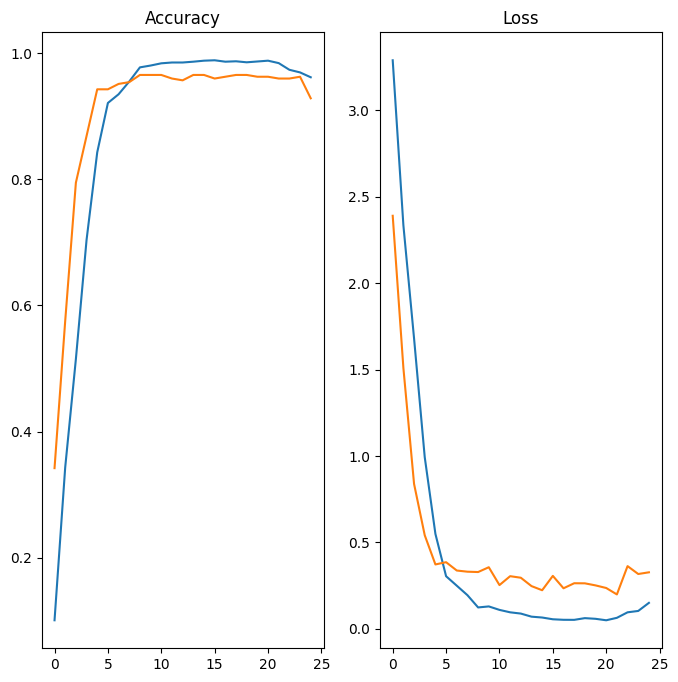

In [27]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [28]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [29]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [30]:
score = tf.nn.softmax(predict)

In [31]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 51.95


In [32]:
    model.save('Image_classify.keras')